In [53]:
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))
from misc.pipeline import get_available_slates
from misc.loader import load_dk_contest, get_player_data, parse_lineup


from scrapper.scrape_games import scrape_games
from scrapper.scrape_games import match_players_to_linestar
from utils.data_loader import load_linestar_data

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [8]:
slate_date = '2025-11-03'

dk_df = load_dk_contest(slate_date)
players_df = get_player_data(dk_df)
lineups_df = dk_df[['Rank', 'Points', 'Lineup']].dropna(subset=['Points', 'Lineup'])
lineups_df['players'] = lineups_df['Lineup'].apply(parse_lineup)
lineups_df = lineups_df.drop_duplicates(subset=['Rank', 'Points'])

In [ ]:
players_df.head()

/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


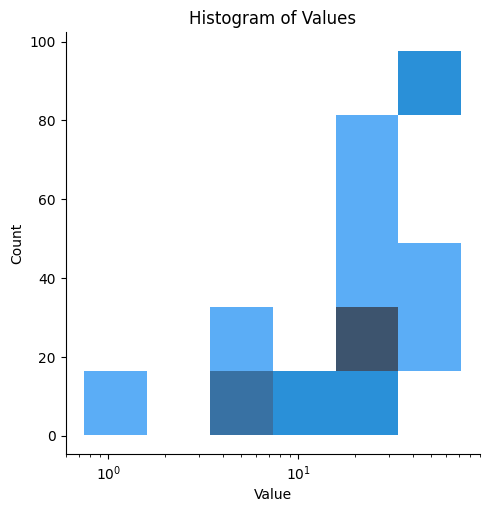

In [33]:
# Create a basic histogram
data = players_df
#data = lineups_df


sns.displot(data=data, x='FPTS',y='%Drafted',log_scale=(True, False))
plt.title('Histogram of Values')
plt.xlabel('Value')
plt.ylabel('Count')
plt.show()

In [11]:
lineups_df.head()


,Rank,Points,Lineup,players
0,1,361.00,C Isaiah Stewart F Tari Eason G Christian Brau...,"[Isaiah Stewart, Tari Eason, Christian Braun, ..."
1,2,360.25,C Isaiah Stewart F Tari Eason G Russell Westbr...,"[Isaiah Stewart, Tari Eason, Russell Westbrook..."
2,3,359.00,C Jusuf Nurkic F Isaiah Stewart G Christian Br...,"[Jusuf Nurkic, Isaiah Stewart, Christian Braun..."
3,4,358.75,C Alperen Sengun F Isaiah Stewart G Max Christ...,"[Alperen Sengun, Isaiah Stewart, Max Christie,..."
4,5,358.00,C Jusuf Nurkic F Isaiah Stewart G Christian Br...,"[Jusuf Nurkic, Isaiah Stewart, Christian Braun..."


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

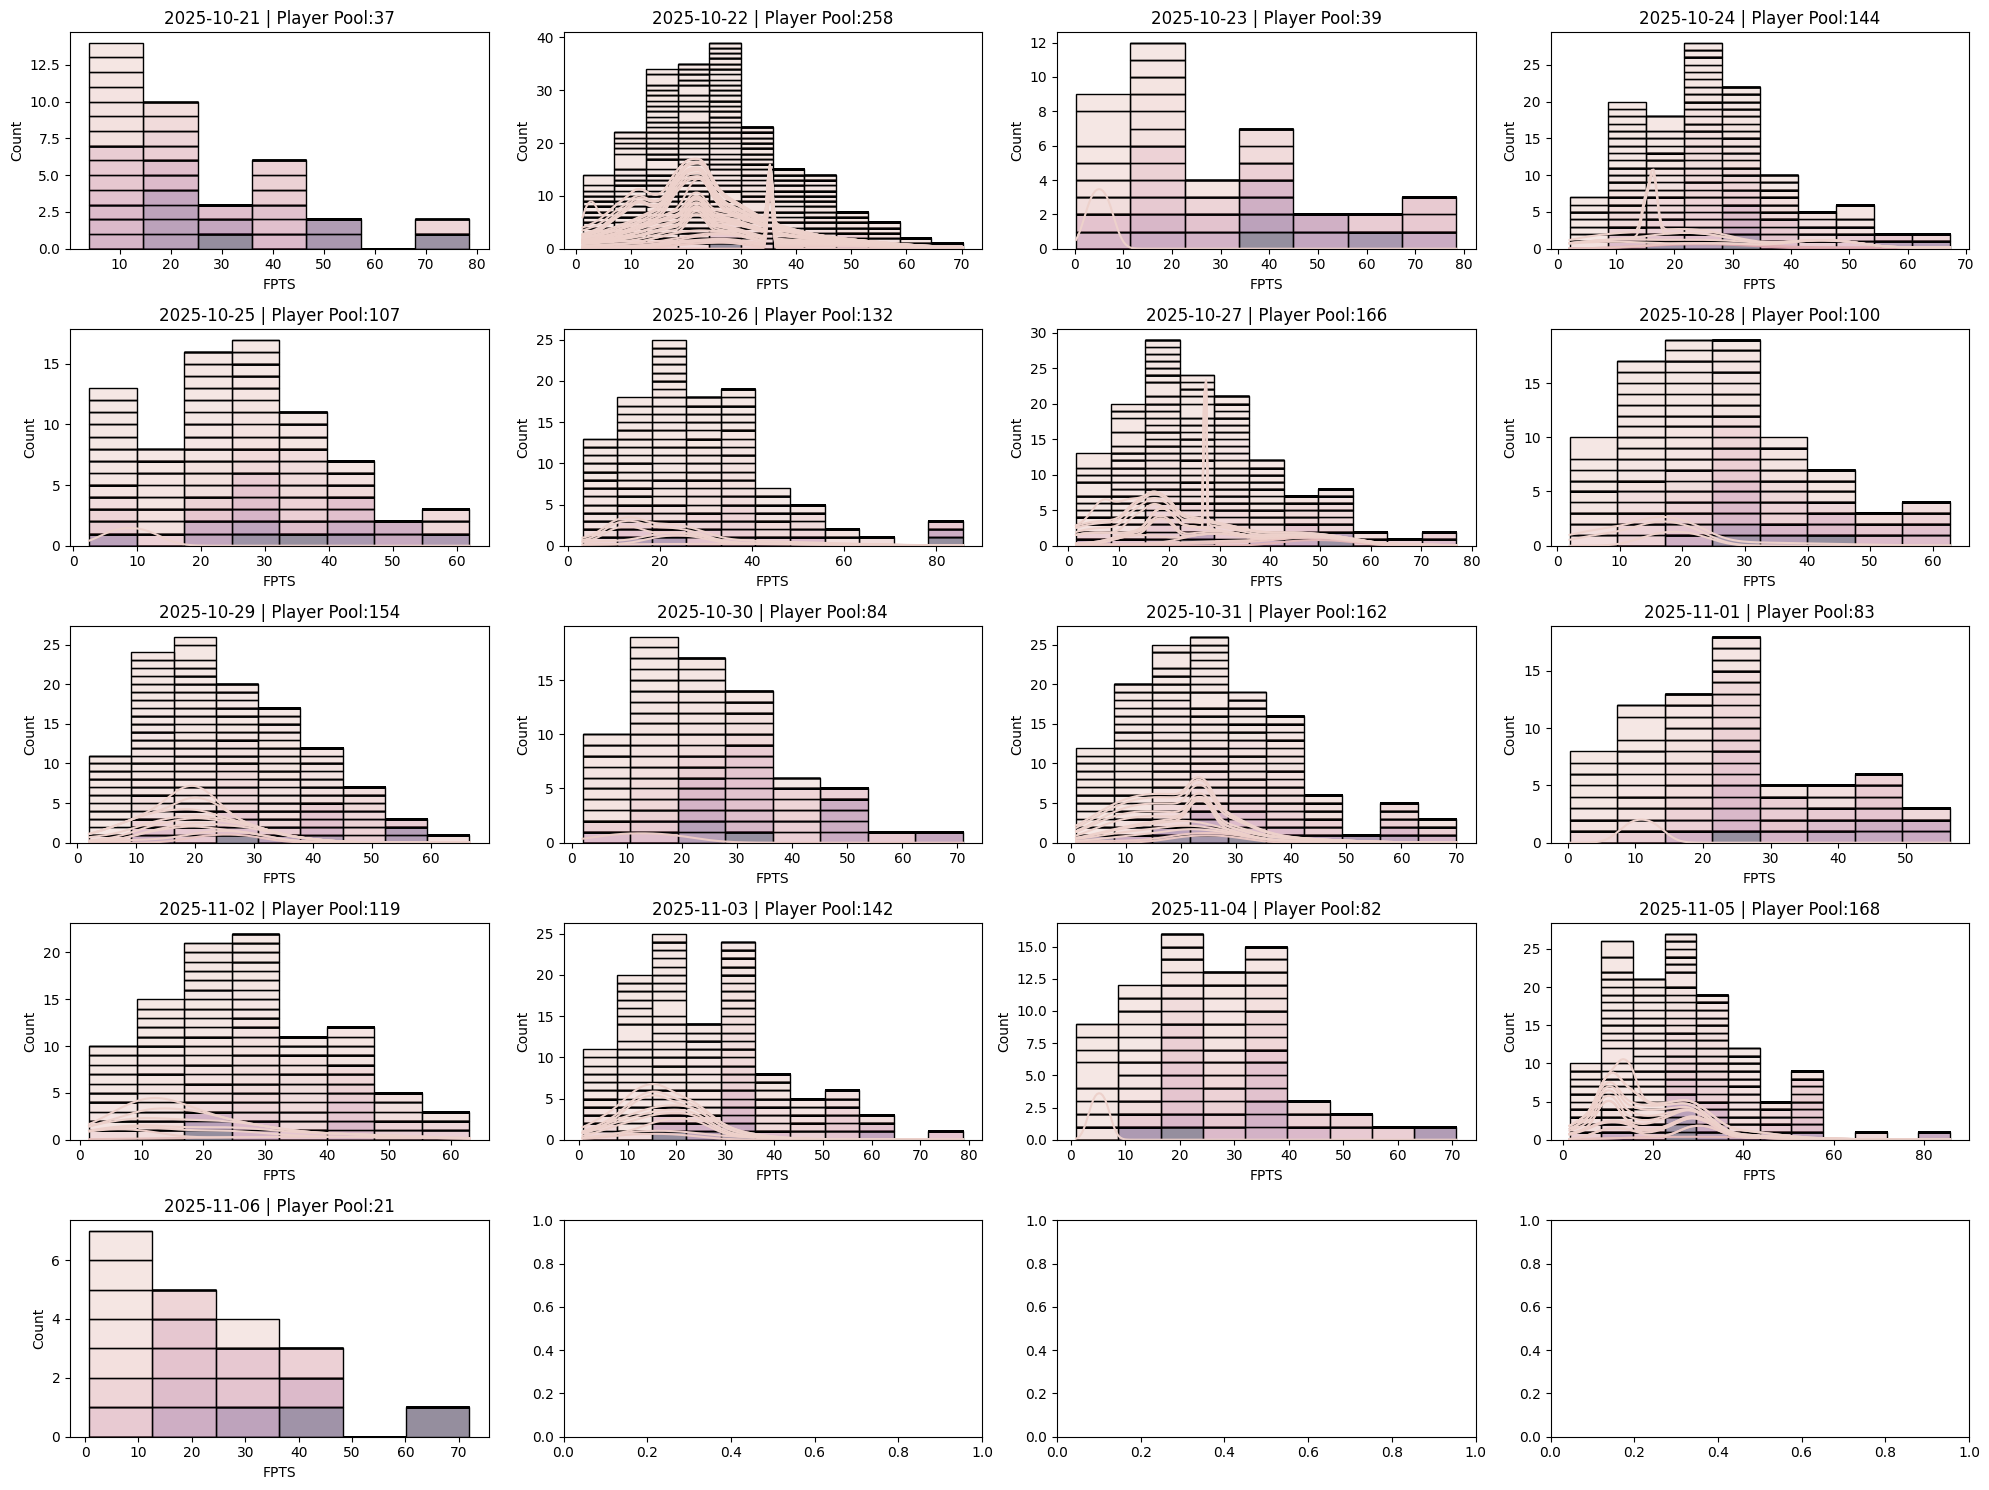

In [42]:
slates = get_available_slates(days_back=30)


#fig, axes = plt.subplots(len(slates), 1, figsize=(8, 3*len(slates)), sharex=True)
fig, axes = plt.subplots((len(slates)+3)//4, 4, figsize=(20, 3*((len(slates)+3)//4)), sharex=False)



#for ax, slate_date in zip(axes, slates):
for ax, slate_date in zip(axes.ravel(), slates):
    dk_df = load_dk_contest(slate_date)
    players_df = get_player_data(dk_df)
    lineups_df = dk_df[['Rank', 'Points', 'Lineup']].dropna(subset=['Points', 'Lineup'])
    lineups_df['players'] = lineups_df['Lineup'].apply(parse_lineup)
    lineups_df = lineups_df.drop_duplicates(subset=['Rank', 'Points'])
    entry_count = len(lineups_df)
    players_df = players_df[players_df['FPTS'] > 0]
    player_count = len(players_df)
    players_df = players_df[players_df['%Drafted'] > 0.1]


    
    sns.histplot(players_df, x='FPTS',hue='%Drafted', multiple='stack', kde=True,fill=True, ax=ax, legend=False);
    title = f'{slate_date} | Player Pool:{player_count}'
    ax.set_title(title)
    fig.tight_layout()
    #sns.jointplot(data=players_df, x='FPTS',y='%Drafted')

In [21]:
print(len(lineups_df))

598


2025-11-08 10:23:22,806 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-21


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

2025-11-08 10:23:27,909 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-22


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves

2025-11-08 10:23:29,002 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-23


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Li

2025-11-08 10:23:29,513 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-24


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves

2025-11-08 10:23:30,251 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-25


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

2025-11-08 10:23:30,717 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-26


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Li

2025-11-08 10:23:31,426 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-27


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Li

2025-11-08 10:23:32,298 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-28


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

2025-11-08 10:23:33,218 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-29


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves

2025-11-08 10:23:33,981 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-30


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

2025-11-08 10:23:34,643 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-31


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves

2025-11-08 10:23:35,337 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-11-01


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Li

2025-11-08 10:23:35,809 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-11-02


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

2025-11-08 10:23:36,493 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-11-03


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves

2025-11-08 10:23:37,266 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-11-04


/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

2025-11-08 10:23:38,226 - scrapper.scrape_games - INFO - No existing games found for 2025-11-05, attempting to find games to scrape
2025-11-08 10:23:38,228 - scrapper.scrape_games - INFO - Found 16 teams from linestar data: ['DEN', 'DAL', 'DET', 'PHI', 'IND', 'HOU', 'CLE', 'MIN', 'MEM', 'NYK', 'NOP', 'MIA', 'BOS', 'UTA', 'BKN', 'WAS']
2025-11-08 10:23:40,189 - scrapper.scrape_games - INFO - Found 1 games for PHI, 1 match date 2025-11-05
2025-11-08 10:23:46,401 - scrapper.scrape_games - INFO - Checking ESPN scoreboard for 2025-11-05...
2025-11-08 10:23:46,545 - scrapper.scrape_games - INFO - Scoreboard found 11 potential games for 2025-11-05
2025-11-08 10:23:46,546 - scrapper.scrape_games - INFO - Added game 401810026 from scoreboard (will verify date after scraping)
2025-11-08 10:23:46,546 - scrapper.scrape_games - INFO - Added game 401810027 from scoreboard (will verify date after scraping)
2025-11-08 10:23:46,547 - scrapper.scrape_games - INFO - Added game 401810028 from scoreboard (

/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/distributions.py:269: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves

2025-11-08 10:23:54,154 - scrapper.scrape_games - INFO - No existing games found for 2025-11-06, attempting to find games to scrape
2025-11-08 10:23:54,156 - scrapper.scrape_games - INFO - Found 2 teams from linestar data: ['PHX', 'LAC']
2025-11-08 10:23:55,700 - scrapper.scrape_games - INFO - Checking ESPN scoreboard for 2025-11-06...
2025-11-08 10:23:55,956 - scrapper.scrape_games - INFO - Scoreboard found 1 potential games for 2025-11-06
2025-11-08 10:23:55,957 - scrapper.scrape_games - INFO - Added game 401810037 from scoreboard (will verify date after scraping)
2025-11-08 10:23:55,958 - scrapper.scrape_games - INFO - Only found 1 game for 2 teams, checking for additional games...
2025-11-08 10:23:56,641 - scrapper.scrape_games - INFO - Found 1 total games for 2025-11-06 (existing: 0, new: 1)
2025-11-08 10:23:56,641 - scrapper.scrape_games - WARNING - Only found 1 game for 2 teams on 2025-11-06. Checking all scraped games...
2025-11-08 10:23:56,694 - scrapper.scrape_games - INFO - 

/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/kgedin/Library/Python/3.9/lib/python/site-packages/seabo

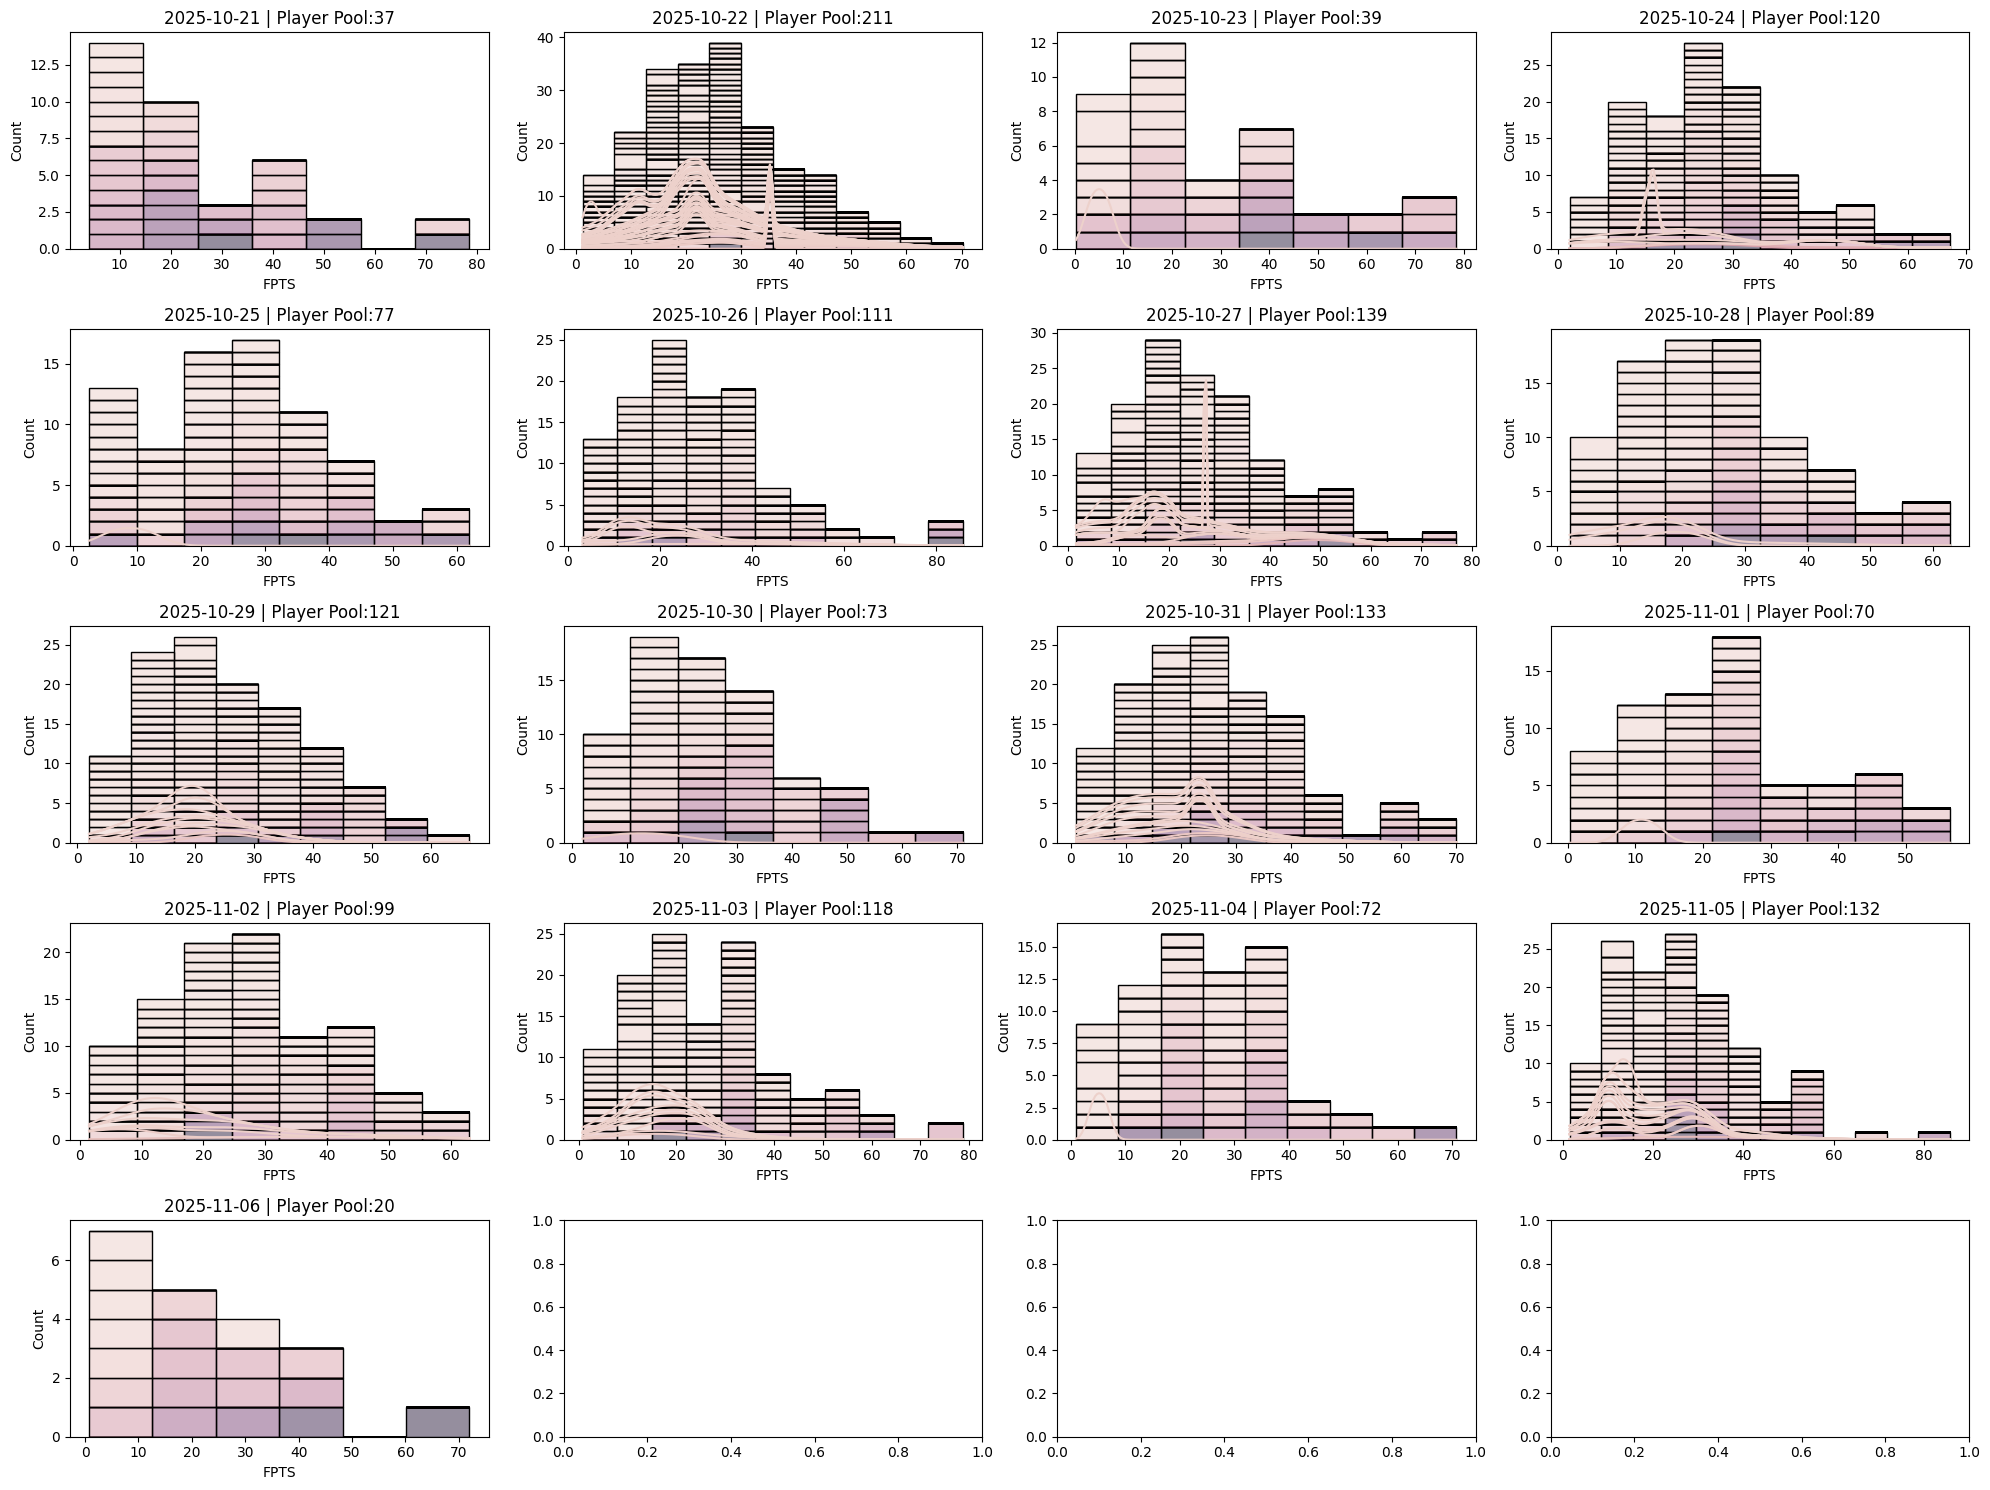

In [49]:
fig, axes = plt.subplots((len(slates)+3)//4, 4, figsize=(20, 3*((len(slates)+3)//4)), sharex=False)

for ax, slate_date in zip(axes.ravel(), slates):
    dk_df = load_dk_contest(slate_date)
    players_df = get_player_data(dk_df)
    lineups_df = dk_df[['Rank', 'Points', 'Lineup']].dropna(subset=['Points', 'Lineup'])
    lineups_df['players'] = lineups_df['Lineup'].apply(parse_lineup)
    lineups_df = lineups_df.drop_duplicates(subset=['Rank', 'Points'])

    pbp_features = scrape_games(slate_date, force_rescrape=False)
    linestar_df = load_linestar_data(slate_date, normalize=True)

    aligned = match_players_to_linestar(
        pbp_features[['Player']],
        linestar_df['Player'].tolist()
    )
    pbp_with_meta = (
        pbp_features.assign(matched_player=aligned['Player'])
        .merge(
            linestar_df[['Player', 'Team', 'Salary']],
            left_on='matched_player',
            right_on='Player',
            how='left'
        )
        .drop(columns=['Momentum'])
    )
    pbp_with_meta = pbp_with_meta[pbp_with_meta['Salary'].notna()]

    players_df = players_df.merge(
        pbp_with_meta[['matched_player', 'Team', 'Salary', 'ClutchFP', 'TouchesPerMin']],
        left_on='Player',
        right_on='matched_player',
        how='left'
    ).drop(columns=['matched_player'])

    players_df = players_df[players_df['FPTS'] > 0]
    players_df = players_df[players_df['%Drafted'] > 0.1]
    player_count = len(players_df)

    sns.histplot(players_df, x='FPTS', hue='%Drafted', multiple='stack',
                 kde=True, fill=True, ax=ax, legend=False)
    ax.set_title(f'{slate_date} | Player Pool:{player_count}')

fig.tight_layout()

In [50]:
players_df

,Player,Roster Position,%Drafted,FPTS,Team,Salary,ClutchFP,TouchesPerMin
0,Devin Booker,CPT,97.58,72.00,PHX,11600.0,12.00,0.837838
1,Ivica Zubac,UTIL,89.41,44.25,LAC,8600.0,0.00,0.925926
2,Mark Williams,UTIL,66.92,31.00,PHX,8200.0,4.75,0.607143
3,John Collins,UTIL,53.32,22.50,LAC,7600.0,0.00,0.782609
4,Grayson Allen,UTIL,40.57,36.75,PHX,5800.0,0.00,0.500000
5,Derrick Jones Jr.,UTIL,38.51,16.25,LAC,3600.0,0.00,0.454545
6,Kris Dunn,UTIL,31.71,22.00,LAC,5000.0,0.00,0.250000
7,Royce O'Neale,UTIL,31.31,27.00,PHX,6200.0,0.00,0.000000
8,Collin Gillespie,UTIL,28.12,18.75,PHX,3400.0,0.00,0.360000
9,Bogdan Bogdanovic,UTIL,27.64,27.00,LAC,1000.0,0.00,0.607143


In [54]:
combined_rows = []

for slate_date in slates:
    dk_df = load_dk_contest(slate_date)
    players_df = get_player_data(dk_df)

    pbp_features = scrape_games(slate_date, force_rescrape=False)
    linestar_df = load_linestar_data(slate_date, normalize=True)

    matched_names = match_players_to_linestar(
        pbp_features[['Player']],
        linestar_df['Player'].tolist()
    )['Player']

    pbp_features = pbp_features.assign(
        Player=matched_names.fillna(pbp_features['Player'])
    )

    pbp_with_meta = (
        pbp_features
        .merge(
            linestar_df[['Player', 'Team', 'Salary']],
            on='Player',
            how='left'
        )
        .drop(columns=['Momentum'])
    )

    merged = (
        players_df.merge(
            pbp_with_meta[['Player', 'Team', 'Salary', 'ClutchFP', 'TouchesPerMin']],
            on='Player',
            how='left'
        )
        .assign(slate_date=slate_date)
    )

    combined_rows.append(merged)

aggregated_df = pd.concat(combined_rows, ignore_index=True)

2025-11-08 10:32:35,391 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-21
2025-11-08 10:32:35,530 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-22
2025-11-08 10:32:35,774 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-23
2025-11-08 10:32:35,833 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-24
2025-11-08 10:32:35,981 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-25
2025-11-08 10:32:36,034 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-26
2025-11-08 10:32:36,144 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-27
2025-11-08 10:32:36,327 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-28
2025-11-08 10:32:36,454 - scrapper.scrape_games - INFO - Loading existing PBP features for 2025-10-29
2025-11-08 10:32:36,594 - scrapper.scrape_games - INFO - Loading existing PBP feat

In [ ]:
aggregated_df['TouchesPerMin'].isna()

307